In [22]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

plt.style.use('../style.mpl')

In [23]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


# Group of nodes

## Cliques
In this section, we explore the concept of **cliques** within the Spotify artist collaboration network. A clique is a subset of nodes where every artist is directly connected to every other artist in the group, forming a completely connected subgraph. These structures often reveal strong collaboration ties or overlapping audience segments among artists.

Total number of cliques: 3043
Largest clique size: 54
Average clique size: 11.96

Clique size distribution:
Cliques of size 2: 35
Cliques of size 3: 113
Cliques of size 4: 144
Cliques of size 5: 139
Cliques of size 6: 176
Cliques of size 7: 184
Cliques of size 8: 147
Cliques of size 9: 162
Cliques of size 10: 214
Cliques of size 11: 269
Cliques of size 12: 252
Cliques of size 13: 262
Cliques of size 14: 182
Cliques of size 15: 148
Cliques of size 16: 119
Cliques of size 17: 68
Cliques of size 18: 45
Cliques of size 19: 48
Cliques of size 20: 50
Cliques of size 21: 23
Cliques of size 22: 39
Cliques of size 23: 33
Cliques of size 24: 37
Cliques of size 25: 28
Cliques of size 26: 22
Cliques of size 27: 8
Cliques of size 28: 24
Cliques of size 29: 18
Cliques of size 30: 5
Cliques of size 31: 2
Cliques of size 32: 2
Cliques of size 33: 4
Cliques of size 34: 7
Cliques of size 35: 5
Cliques of size 37: 9
Cliques of size 38: 8
Cliques of size 39: 3
Cliques of size 40: 3
Cliques of size 41: 2
C

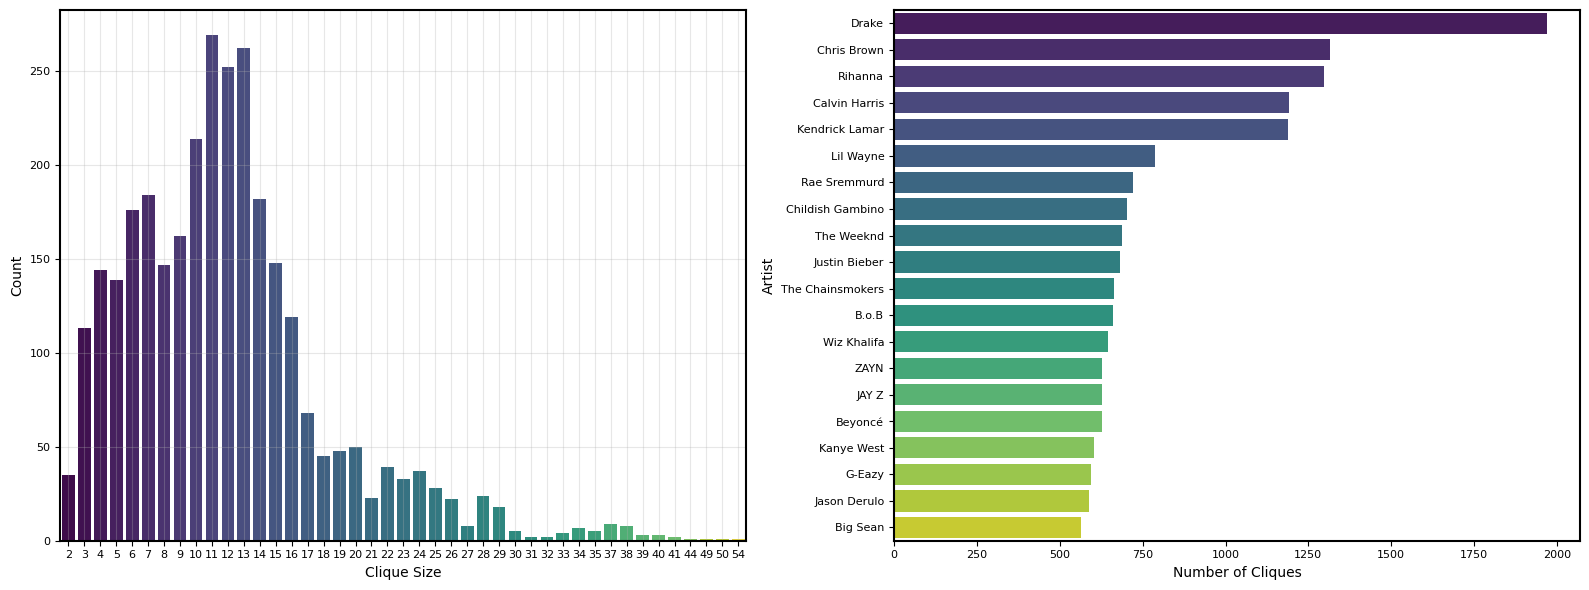


The largest clique contains 54 artists.
The second largest clique contains 50 artists.
The third largest clique contains 49 artists.


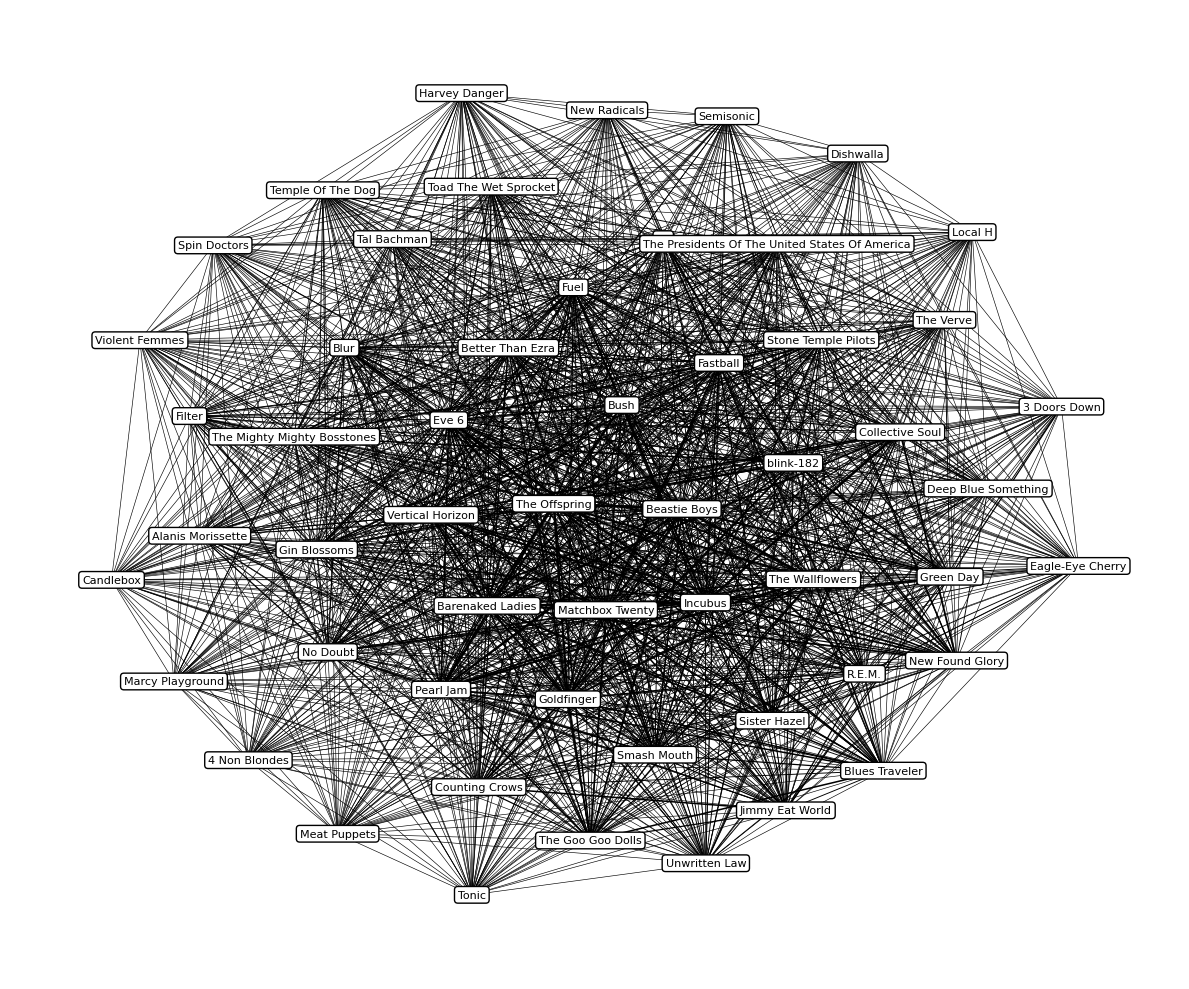

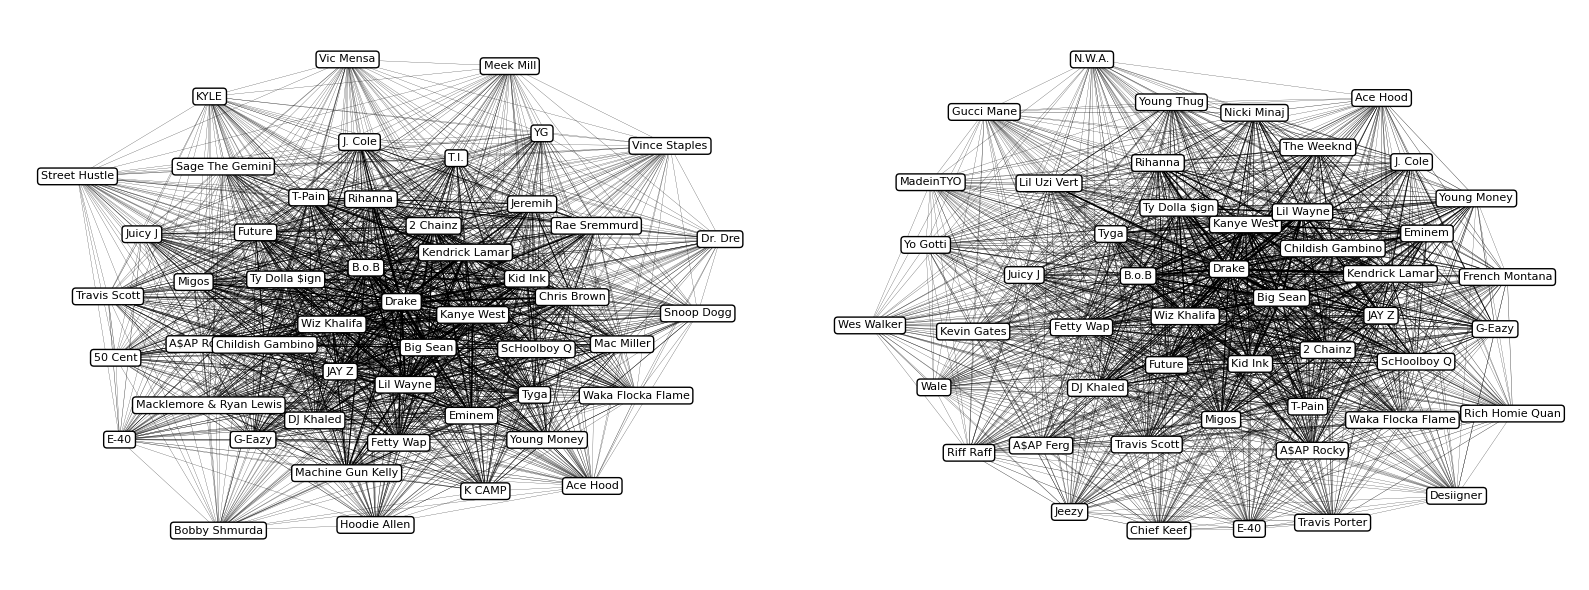


Members of the largest clique:
1. Incubus
2. Bush
3. Eve 6
4. The Offspring
5. Blur
6. Beastie Boys
7. No Doubt
8. Pearl Jam
9. The Presidents Of The United States Of America
10. Lit
11. Stone Temple Pilots
12. Gin Blossoms
13. blink-182
14. The Mighty Mighty Bosstones
15. Green Day
16. The Verve
17. Filter
18. Temple Of The Dog
19. Smash Mouth
20. Collective Soul
21. The Wallflowers
22. Eagle-Eye Cherry
23. Fastball
24. Barenaked Ladies
25. New Found Glory
26. Deep Blue Something
27. Goldfinger
28. Better Than Ezra
29. Vertical Horizon
30. Toad The Wet Sprocket
31. Matchbox Twenty
32. Fuel
33. Unwritten Law
34. Sister Hazel
35. Meat Puppets
36. Violent Femmes
37. Tonic
38. R.E.M.
39. Candlebox
40. New Radicals
41. Local H
42. 4 Non Blondes
43. Dishwalla
44. Harvey Danger
45. The Goo Goo Dolls
46. 3 Doors Down
47. Marcy Playground
48. Blues Traveler
49. Tal Bachman
50. Jimmy Eat World
51. Counting Crows
52. Semisonic
53. Alanis Morissette
54. Spin Doctors

Members of the second larges

In [24]:
cliques = list(nx.find_cliques(G))

clique_sizes = [len(c) for c in cliques]
print(f"Total number of cliques: {len(cliques)}")
print(f"Largest clique size: {max(clique_sizes)}")
print(f"Average clique size: {sum(clique_sizes) / len(clique_sizes):.2f}")

size_counts = Counter(clique_sizes)
print("\nClique size distribution:")
for size, count in sorted(size_counts.items()):
    print(f"Cliques of size {size}: {count}")

artist_clique_count = {}
for clique in cliques:
    for artist in clique:
        artist_clique_count[artist] = artist_clique_count.get(artist, 0) + 1

df_clique_counts = pd.DataFrame(list(artist_clique_count.items()), 
                               columns=['Artist', 'Number of Cliques'])
df_clique_counts = df_clique_counts.set_index('Artist').sort_values('Number of Cliques', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=list(size_counts.keys()), y=list(size_counts.values()), ax=axes[0], 
            hue=list(size_counts.keys()), palette="viridis", legend=False)
axes[0].set_xlabel('Clique Size')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3)

top_clique_artists = df_clique_counts.head(20)
print("\nTop 20 artists by number of cliques:")
print(top_clique_artists.head(20))

sns.barplot(x=top_clique_artists['Number of Cliques'], y=top_clique_artists.index, ax=axes[1],
            hue=top_clique_artists.index, palette="viridis", legend=False)
axes[1].set_xlabel('Number of Cliques')
axes[1].set_ylabel('Artist')

plt.tight_layout()
plt.savefig('../plots/combined_clique_analysis.png', transparent=True)
plt.show()

sorted_cliques = sorted(cliques, key=len, reverse=True)
largest_clique = sorted_cliques[0]  
second_largest_clique = sorted_cliques[1]
third_largest_clique = sorted_cliques[2]

print(f"\nThe largest clique contains {len(largest_clique)} artists.")
print(f"The second largest clique contains {len(second_largest_clique)} artists.")
print(f"The third largest clique contains {len(third_largest_clique)} artists.")

plt.figure(figsize=(12, 10))
largest_clique_subgraph = G.subgraph(largest_clique)
pos = nx.spring_layout(largest_clique_subgraph, seed=42, k=0.6)

edge_weights = [largest_clique_subgraph[u][v]['weight'] for u, v in largest_clique_subgraph.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [w / max_weight * 2 for w in edge_weights]

nx.draw_networkx_edges(largest_clique_subgraph, pos, edge_color='black', width=normalized_weights)
nx.draw_networkx_labels(
    largest_clique_subgraph, pos, font_size=8, verticalalignment='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)

plt.axis('off')
plt.tight_layout()
plt.savefig("../plots/largest_clique.png", transparent=True)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

second_clique_subgraph = G.subgraph(second_largest_clique)
pos_second = nx.spring_layout(second_clique_subgraph, seed=43, k=0.6)

edge_weights_second = [second_clique_subgraph[u][v]['weight'] for u, v in second_clique_subgraph.edges()]
max_weight_second = max(edge_weights_second) if edge_weights_second else 1
normalized_weights_second = [w / max_weight_second * 2 for w in edge_weights_second]

nx.draw_networkx_edges(second_clique_subgraph, pos_second, edge_color='black', width=normalized_weights_second, ax=axes[0])
nx.draw_networkx_labels(
    second_clique_subgraph, pos_second, font_size=8, verticalalignment='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
    ax=axes[0]
)
axes[0].axis('off')

third_clique_subgraph = G.subgraph(third_largest_clique)
pos_third = nx.spring_layout(third_clique_subgraph, seed=44, k=0.6)

edge_weights_third = [third_clique_subgraph[u][v]['weight'] for u, v in third_clique_subgraph.edges()]
max_weight_third = max(edge_weights_third) if edge_weights_third else 1
normalized_weights_third = [w / max_weight_third * 2 for w in edge_weights_third]

nx.draw_networkx_edges(third_clique_subgraph, pos_third, edge_color='black', width=normalized_weights_third, ax=axes[1])
nx.draw_networkx_labels(
    third_clique_subgraph, pos_third, font_size=8, verticalalignment='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
    ax=axes[1]
)
axes[1].axis('off')

plt.tight_layout()
plt.savefig("../plots/second_third_largest_cliques.png", transparent=True)
plt.show()

print(f"\nMembers of the largest clique:")
for i, artist in enumerate(largest_clique, 1):
    print(f"{i}. {artist}")

print(f"\nMembers of the second largest clique:")
for i, artist in enumerate(second_largest_clique, 1):
    print(f"{i}. {artist}")

print(f"\nMembers of the third largest clique:")
for i, artist in enumerate(third_largest_clique, 1):
    print(f"{i}. {artist}")